In [123]:
using Plots; gr()
using Reproduce
using FileIO
using Statistics
using ProgressMeter
using JLD2
data_home = "../Experiment1_final"


"../Experiment1_final"

In [156]:
include("./plot_utils.jl")
GPU = GeneralPlotUtils

Main.GeneralPlotUtils

In [157]:
# experiment_folders = ["../data/Experiment1 (copy)"]
# experiment_folders = ["../Experiment1"]
experiment_folders = ["../data/Experiment1Final"]

1-element Array{String,1}:
 "../data/Experiment1Final"

In [158]:
data_key = :ttmaze_uniform_error

:ttmaze_uniform_error

In [159]:
ic = ItemCollection(joinpath(experiment_folders[1], "data"));
diff(ic)

Dict{String,Array} with 9 entries:
  "demon_learner" => ["LSTD", "Q", "SR"]
  "demon_eta"     => [0.00195312, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0…
  "drifter"       => [[0.1, 1.0], [1.0, 0.1]]
  "demon_opt"     => ["ADAM", "Auto", "Descent"]
  "save_keys"     => [["demon_opt", "seed", "demon_eta", "demon_learner", "expl…
  "seed"          => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  91, 92, 93, 94, 95, 96,…
  "behaviour_eta" => [0.25, 0.5]
  "save_dir"      => ["Experiment1/data", "Experiment1_part_4/data", "~/scratch…
  "demon_update"  => ["ESARSA", "TB"]

In [160]:
# length(search(ic, Dict("demon_learner" => "LSTD")))
length(ic)

8000

In [161]:
algo_divisor_keys = ["demon_learner", "demon_opt", "demon_update"]
# algo_divisor_keys = []
sweep_params = ["demon_eta"]
sweep_params = ["demon_eta", "demon_beta_m", "demon_beta_v"]

algo_specs_full = GPU.split_algo(ic, algo_divisor_keys)
# algo_specs_full = ic

["demon_learner", "demon_opt", "demon_update"]


18-element Array{Any,1}:
 Dict{Any,Any}("demon_learner" => "LSTD","demon_opt" => "ADAM","demon_update" => "ESARSA")
 Dict{Any,Any}("demon_learner" => "LSTD","demon_opt" => "ADAM","demon_update" => "TB")
 Dict{Any,Any}("demon_learner" => "LSTD","demon_opt" => "Auto","demon_update" => "ESARSA")
 Dict{Any,Any}("demon_learner" => "LSTD","demon_opt" => "Auto","demon_update" => "TB")
 Dict{Any,Any}("demon_learner" => "LSTD","demon_opt" => "Descent","demon_update" => "ESARSA")
 Dict{Any,Any}("demon_learner" => "LSTD","demon_opt" => "Descent","demon_update" => "TB")
 Dict{Any,Any}("demon_learner" => "Q","demon_opt" => "ADAM","demon_update" => "ESARSA")
 Dict{Any,Any}("demon_learner" => "Q","demon_opt" => "ADAM","demon_update" => "TB")
 Dict{Any,Any}("demon_learner" => "Q","demon_opt" => "Auto","demon_update" => "ESARSA")
 Dict{Any,Any}("demon_learner" => "Q","demon_opt" => "Auto","demon_update" => "TB")
 Dict{Any,Any}("demon_learner" => "Q","demon_opt" => "Descent","demon_update" => "ESARSA")


In [162]:
all_algos_ics = [search(ic,algo_spec) for algo_spec in algo_specs_full]
# all_algos_ics = [search(ic,algo_specs_full)]
length.(all_algos_ics)


18-element Array{Int64,1}:
    0
    0
    0
    0
    0
  200
    0
 2000
  700
  700
  700
  700
    0
 1600
    0
  700
    0
  700

In [163]:
valid_algos_ind = findall(a -> length(a) != 0, all_algos_ics)

algo_specs = algo_specs_full[valid_algos_ind]
algo_ics = all_algos_ics[valid_algos_ind]

9-element Array{ItemCollection,1}:
 ItemCollection(Reproduce.Item[Reproduce.Item("../data/Experiment1Final/data/RP_0_0x117ba26d1e6e2e4f", Dict{String,Any}("logger_keys" => ["TTMAZE_ERROR", "TTMAZE_UNIFORM_ERROR", "TTMAZE_OLD_ERROR"],"steps" => 2000,"behaviour_learner" => "Q","exploration_param" => 0.0,"exploration_strategy" => "epsilon_greedy","use_external_reward" => true,"demon_eta" => 0.25,"horde_type" => "regular","drifter" => [0.1, 1.0],"_GIT_INFO" => "0"…), ["steps", "exploration_strategy", "use_external_reward", "demon_lambda", "save_keys", "demon_update", "demon_learner", "behaviour_update", "behaviour_opt", "behaviour_lambda"  …  "demon_trace", "behaviour_gamma", "behaviour_trace", "distractor", "save_dir", "demon_alpha_init", "demon_opt", "seed", "demon_discounts", "demon_policy_type"]), Reproduce.Item("../data/Experiment1Final/data/RP_0_0x1233e3f44b69ccfe", Dict{String,Any}("logger_keys" => ["TTMAZE_ERROR", "TTMAZE_UNIFORM_ERROR", "TTMAZE_OLD_ERROR"],"steps" => 2000,"behavio

In [165]:
algo_specs

9-element Array{Any,1}:
 Dict{Any,Any}("demon_learner" => "LSTD","demon_opt" => "Descent","demon_update" => "TB")
 Dict{Any,Any}("demon_learner" => "Q","demon_opt" => "ADAM","demon_update" => "TB")
 Dict{Any,Any}("demon_learner" => "Q","demon_opt" => "Auto","demon_update" => "ESARSA")
 Dict{Any,Any}("demon_learner" => "Q","demon_opt" => "Auto","demon_update" => "TB")
 Dict{Any,Any}("demon_learner" => "Q","demon_opt" => "Descent","demon_update" => "ESARSA")
 Dict{Any,Any}("demon_learner" => "Q","demon_opt" => "Descent","demon_update" => "TB")
 Dict{Any,Any}("demon_learner" => "SR","demon_opt" => "ADAM","demon_update" => "TB")
 Dict{Any,Any}("demon_learner" => "SR","demon_opt" => "Auto","demon_update" => "TB")
 Dict{Any,Any}("demon_learner" => "SR","demon_opt" => "Descent","demon_update" => "TB")

In [166]:
best_per_algo_ics = []
for (i,algo_ic) in enumerate(algo_ics)
    println(i)
    push!(best_per_algo_ics, GPU.get_best(algo_ic,sweep_params, data_key))
end

1
["demon_eta", "demon_beta_m", "demon_beta_v"]
[0.5014659797175646, 0.44964448439092475]
2
["demon_eta", "demon_beta_m", "demon_beta_v"]
[0.6207724096006464, 0.6168977950840565, 0.6461822677673714, 0.6190514636343643, 0.575378566805323, 0.5660538928050871, 0.7281884264450355, 0.5728347332793334, 0.516716817357137, 0.5016367578033557, 0.9942489674116917, 0.5248401831060747, 0.46584236059670836, 0.4472098723669144, 1.6129682636037446, 0.5156773299028979, 0.4702321713176465, 0.453646355933542, 2.7920638569487526, 0.5887930583634593]
3
["demon_eta", "demon_beta_m", "demon_beta_v"]
[0.4259538489993471, 0.42548274456017066, 0.42482116545535176, 0.423864744782427, 0.422413241068556, 0.42098866124813733, 0.4260103033889181]
4
["demon_eta", "demon_beta_m", "demon_beta_v"]
[0.38196680790044446, 0.3823192602225393, 0.3825112957069476, 0.38216144920196127, 0.38143637931241015, 0.3810854002285397, 0.38377508882861594]
5
["demon_eta", "demon_beta_m", "demon_beta_v"]
[0.6213388902068211, 0.597424109

In [167]:
length.(best_per_algo_ics)

9-element Array{Int64,1}:
 100
 100
 100
 100
 100
 100
 100
 100
 100

In [168]:
data = [GPU.smooth(GPU.get_stats(GPU.load_results(ic,data_key))[1],5) for ic in best_per_algo_ics]
std = [GPU.smooth(GPU.get_stats(GPU.load_results(ic,data_key))[2],5) for ic in best_per_algo_ics]


9-element Array{Array{Float64,1},1}:
 [0.08388107672913042, 0.0912132098138892, 0.09641747097789503, 0.10236789707756297, 0.10703158110236063, 0.11781775943505797, 0.1258401724278675, 0.13283724540557748, 0.14023737320995974, 0.14733686083218855  …  0.19897959502552282, 0.20137821403362763, 0.2019833684666076, 0.20310254523967375, 0.20544057905667903, 0.20961106740467422, 0.21544669646309625, 0.22147152081962881, 0.22768302801661236, 0.23236266973684047]
 [0.08103560117502837, 0.08985548820261366, 0.09512514995076866, 0.10395430107985891, 0.1101836800336196, 0.1209741088218315, 0.13159609831499305, 0.14056693828372052, 0.14536020599488642, 0.1504777827229627  …  0.23937011378992507, 0.24390426938045348, 0.24847107973922275, 0.25099184480456654, 0.25408682818382333, 0.25351775950934247, 0.2536262950856978, 0.25484885112353156, 0.257546594364482, 0.2553828911125872]
 [0.08729230526029416, 0.09704602374119661, 0.10216594936161916, 0.10598780149374085, 0.11038483277007605, 0.11785872460797

In [169]:
algo_specs
[GPU.print_params(algo, algo_divisor_keys, sweep_params) for algo in best_per_algo_ics]

For IC: 
demon_learner  LSTD
demon_opt  Descent
demon_update  TB
demon_eta  0.5

For IC: 
demon_learner  Q
demon_opt  ADAM
demon_update  TB
demon_eta  0.015625
demon_beta_m  0.99
demon_beta_v  0.999

For IC: 
demon_learner  Q
demon_opt  Auto
demon_update  ESARSA
demon_eta  0.5

For IC: 
demon_learner  Q
demon_opt  Auto
demon_update  TB
demon_eta  0.5

For IC: 
demon_learner  Q
demon_opt  Descent
demon_update  ESARSA
demon_eta  0.5

For IC: 
demon_learner  Q
demon_opt  Descent
demon_update  TB
demon_eta  1.0

For IC: 
demon_learner  SR
demon_opt  ADAM
demon_update  TB
demon_eta  0.03125
demon_beta_m  0.9
demon_beta_v  0.99

For IC: 
demon_learner  SR
demon_opt  Auto
demon_update  TB
demon_eta  0.5

For IC: 
demon_learner  SR
demon_opt  Descent
demon_update  TB
demon_eta  1.0



9-element Array{Nothing,1}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing

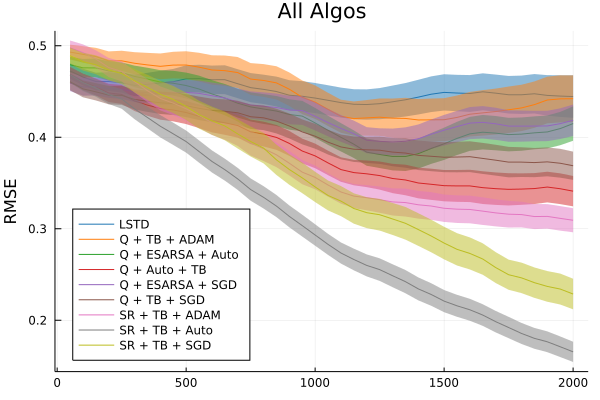

In [170]:
# labels = ["LSTD" "Q + ESARSA + Auto" "Q + ESARSA + SGD"]
labels = ["LSTD" "Q + TB + ADAM" "Q + ESARSA + Auto" "Q + Auto + TB" "Q + ESARSA + SGD" "Q + TB + SGD" "SR + TB + ADAM" "SR + TB + Auto" "SR + TB + SGD"]
ylabel = "RMSE"
title = "All Algos"
step_increment=50
num_samples = length(data[1])
xticks=collect(step_increment:step_increment:num_samples*step_increment)
(:tab10)
plot(xticks, data, ylabel=ylabel, palette=:tab10, label= labels, ribbon = std/sqrt(100), legend=:bottomleft, title=title)

In [64]:
savefig("./plots/experiment1_all_uniform.png")

In [65]:
#Replicating plot from Experiment 1.
inds_to_replicate = [1,2,5,6]
label_subset = labels[:,inds_to_replicate]
data_subset = data[inds_to_replicate]

label_subset

1×4 Array{String,2}:
 "LSTD"  "Q + ESARSA + Auto"  "Q + TB + SGD"  "SR + TB + Auto"

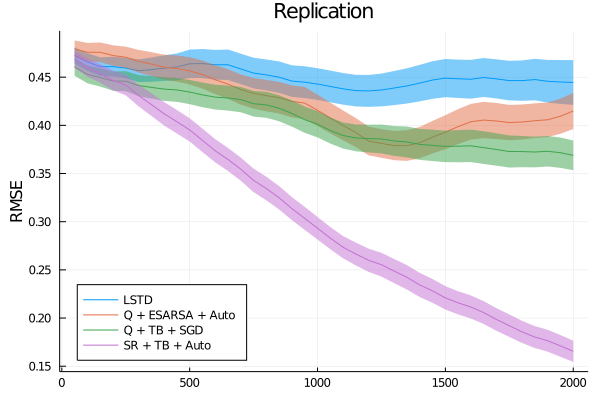

In [66]:
title = "Replication"
ylabel = "RMSE"
step_increment=50
num_samples = length(data[1])
xticks=collect(step_increment:step_increment:num_samples*step_increment)
plot(xticks, data_subset,ylabel= ylabel, label= label_subset, ribbon = std[inds_to_replicate]/sqrt(100), legend=:bottomleft, title=title)

In [67]:
savefig("./plots/experiment1_replicate_uniform.png")